### Vaccine Hesitancy and Vaccination Rate 

**Question**: Is there a relationship between vaccination rate and hesitancy?

For this question, I will be utilizing data munging and data visualization techniques to explore this relationship. 

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import requests

<IPython.core.display.Javascript object>

In [19]:
# Request hesitancy data
hesitancy_endpoint = "https://data.cdc.gov/resource/q9mh-h2tw.json?$limit=4000"
r = requests.get(hesitancy_endpoint)

hesitancy_df = pd.DataFrame(r.json())

<IPython.core.display.Javascript object>

In [59]:
import warnings

warnings.filterwarnings("ignore")

# Here, I delete the last two columns of the df as they're unecessary for this analysis
hesitancy_df = hesitancy_df.iloc[:, :-2]

# Then, I change these columns from objects to float to compute arithmetic operations
hesitancy_df["social_vulnerability_index"] = hesitancy_df[
    "social_vulnerability_index"
].astype(float)
hesitancy_df["estimated_hesitant"] = hesitancy_df["estimated_hesitant"].astype(float)
hesitancy_df["estimated_hesitant_or_unsure"] = hesitancy_df[
    "estimated_hesitant_or_unsure"
].astype(float)
hesitancy_df["estimated_strongly_hesitant"] = hesitancy_df[
    "estimated_strongly_hesitant"
].astype(float)
hesitancy_df["percent_adults_fully"] = hesitancy_df["percent_adults_fully"].astype(
    float
)

# Here, I want to find the average hesitancy rate for the three levels and percent of adults fully vaccinated.
avg_hesitant = hesitancy_df["estimated_hesitant"].mean()
avg_hesitant_unsure = hesitancy_df["estimated_hesitant_or_unsure"].mean()
avg_strongly_hesitant = hesitancy_df["estimated_strongly_hesitant"].mean()
avg_fully_vax = hesitancy_df["percent_adults_fully"].mean()
avg_svi = hesitancy_df["social_vulnerability_index"].mean()
print(
    f"""
Hesitancy statistics are:
Average % of Population Who Are Hesitant: {avg_hesitant}
Average % of Population Who Are Hesitant or Unsure: {avg_hesitant_unsure}
Average % of Population Who Are Strongly Hesitant: {avg_strongly_hesitant}

The Average Vaccination Rate is {avg_fully_vax}
The Average SVI is {avg_svi}

"""
)


Hesitancy statistics are:
Average % of Population Who Are Hesitant: 0.13260022278803316
Average % of Population Who Are Hesitant or Unsure: 0.19142889879057942
Average % of Population Who Are Strongly Hesitant: 0.08665276893698283

The Average Vaccination Rate is 0.399398393854748
The Average SVI is 0.49999999999999956




<IPython.core.display.Javascript object>

In [21]:
# I create a sub dataset for the variables of interest
hes_vax_rate = hesitancy_df[
    [
        "fips_code",
        "county_name",
        "state",
        "social_vulnerability_index",
        "cvac_category",
        "estimated_hesitant",
        "estimated_hesitant_or_unsure",
        "estimated_strongly_hesitant",
        "percent_adults_fully",
    ]
]

<IPython.core.display.Javascript object>

In [34]:
hes_vax_rate.corr(method="spearman")

,social_vulnerability_index,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,percent_adults_fully
social_vulnerability_index,1.000000,0.300054,0.389959,0.326098,-0.306294
estimated_hesitant,0.300054,1.000000,0.971988,0.970170,-0.287178
estimated_hesitant_or_unsure,0.389959,0.971988,1.000000,0.943778,-0.344542
estimated_strongly_hesitant,0.326098,0.970170,0.943778,1.000000,-0.299400
percent_adults_fully,-0.306294,-0.287178,-0.344542,-0.299400,1.000000


<IPython.core.display.Javascript object>

#### Correlation Interpretation
First, comparing the hesitancy variables and percent of adults fully vaccinated to social vulnerability index, we see that there's a positive correlation for all three levels of hesitancy while there is a negative correlation for percent of adults fully vaccinated. 

This result is not surprising. As there's an increase of social vulnerability, hesitancy increases slightly as well. Our social vulnerability index variable is the extent to which a community is socially vulnerable to disaster. The factors considered in developing the SVI include economic data as well as data regarding education, family characteristics, housing language ability, ethnicity, and vehicle access. All of these factors play a role into an individual's likelihood of trusting the vaccine. But, we do have to note that these correlation values aren't extremely large to note a strong relationship between the variables. 

Furthermore, we find that there's a negative correlation for all three levels of hesitancy with percent of adults fully vaccinated. As individuals are more hesitant, the percent of fully vaccinated individuals would decrease. 

But, let's look at how strong this finding is with the top 100 counties with the highest hesitancy rate of strongly hesitant. 

In [22]:
# Now, I want to find the top 100 counties with the highest hesistancy rate of strongly hesitant
strongly_hes = hes_vax_rate.nlargest(100, "estimated_strongly_hesitant")
strongly_hes = strongly_hes.reset_index(drop=True)
strongly_hes

,fips_code,county_name,state,social_vulnerability_index,cvac_category,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,percent_adults_fully
0,30073,"Pondera County, Montana",MONTANA,0.83,Low Concern,0.2670,0.3233,0.1824,0.475
1,30041,"Hill County, Montana",MONTANA,0.70,Low Concern,0.2670,0.3233,0.1824,0.515
2,30005,"Blaine County, Montana",MONTANA,0.92,High Concern,0.2670,0.3233,0.1824,0.758
3,30015,"Chouteau County, Montana",MONTANA,0.48,Moderate Concern,0.2670,0.3233,0.1824,0.284
4,30059,"Meagher County, Montana",MONTANA,0.05,Low Concern,0.2670,0.3233,0.1824,0.476
...,...,...,...,...,...,...,...,...,...
95,5145,"White County, Arkansas",ARKANSAS,0.74,Moderate Concern,0.2265,0.2777,0.1509,0.349
96,5147,"Woodruff County, Arkansas",ARKANSAS,0.85,High Concern,0.2265,0.2777,0.1509,0.458
97,21051,"Clay County, Kentucky",KENTUCKY,0.91,Moderate Concern,0.2210,0.2796,0.1503,0.336
98,21125,"Laurel County, Kentucky",KENTUCKY,0.75,Low Concern,0.2210,0.2796,0.1503,0.331


<IPython.core.display.Javascript object>

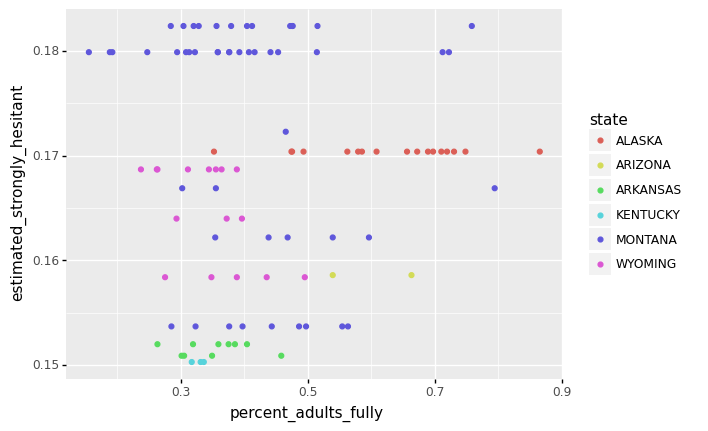

<ggplot: (8762634427112)>

<IPython.core.display.Javascript object>

In [51]:
import plotnine as p9

gg = p9.ggplot(strongly_hes)
gg += p9.aes(
    x="percent_adults_fully", y="estimated_strongly_hesitant", color="state"
)  # add color mapping
gg += p9.geom_point()
gg

In [57]:
higher_avg = strongly_hes.loc[strongly_hes["percent_adults_fully"] > 0.399]
higher_avg.shape

(47, 9)

<IPython.core.display.Javascript object>

#### Plot Interpretation
From this plot, we can see that the top 100 counties with the highest rate of strong hesitancy, come from Alaska, Arizona, Arkansas, Kentucky, Montana, and Wyoming. 

Noting that the average vaccination rate across the U.S. is 0.399398393854748, we see that although these counties have the highest rate of strong hesitancy, 47 counties have a higher vaccination rate than the average. 

We also notice that Montana is the state with some of the highest hesitancy rates across the U.S. 

So now, I'd like to explore some possible influences of vaccine hesitanty and vaccination rate. Is social vulnerabilty index or cvac category a large influence on vaccine hesitancy? Is vaccine distribution an issue in some counties? 

<AxesSubplot:title={'center':'Stacked Bar Graph of Hesitancy by State'}, xlabel='state'>

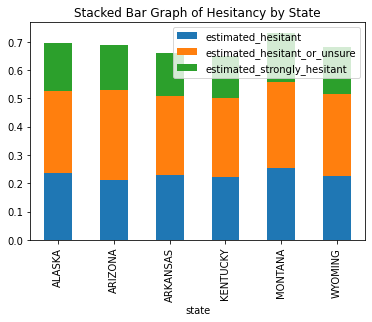

<IPython.core.display.Javascript object>

In [58]:
strong_hes_state = strongly_hes.groupby(["state"]).mean()
strong_hes_state = strong_hes_state.drop(
    columns=["social_vulnerability_index", "percent_adults_fully"]
)
strong_hes_state = strong_hes_state.reset_index()
strong_hes_state.plot(
    x="state", kind="bar", stacked=True, title="Stacked Bar Graph of Hesitancy by State"
)

#### Bar Graph Interpretation 
From this bar graph, we see that although this subsetted data includes the top 100 counties with the highest rate of strong hesitancy, the category of estimated hesitant or unsure makes up the largest proportion. Overall, these states still have a faily large hesitancy rate overall. 

In [25]:
strongly_hes["cvac_category"].value_counts()

Low Concern          27
High Concern         26
Moderate Concern     20
Very High Concern    15
Very Low Concern     12
Name: cvac_category, dtype: int64

<IPython.core.display.Javascript object>

In [26]:
strongly_hes["social_vulnerability_index"].mean()

0.45409999999999995

<IPython.core.display.Javascript object>

In [50]:
strongly_hes["percent_adults_fully"].mean()

0.43541414141414136

<IPython.core.display.Javascript object>

In [60]:
strongly_hes.corr(method="spearman")

,social_vulnerability_index,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,percent_adults_fully
social_vulnerability_index,1.000000,-0.244683,-0.232389,-0.264885,0.419174
estimated_hesitant,-0.244683,1.000000,0.791294,0.902618,0.044983
estimated_hesitant_or_unsure,-0.232389,0.791294,1.000000,0.855796,-0.075386
estimated_strongly_hesitant,-0.264885,0.902618,0.855796,1.000000,0.089891
percent_adults_fully,0.419174,0.044983,-0.075386,0.089891,1.000000


<IPython.core.display.Javascript object>

#### Value Interpretation
Now, I want to look into the 100 counties with the lowest vaccination rate to explore some possible reasons as to why it's the lowest. 

In [28]:
lowest_vax = hes_vax_rate.nsmallest(100, "percent_adults_fully")
lowest_vax = lowest_vax.reset_index(drop=True)
lowest_vax

,fips_code,county_name,state,social_vulnerability_index,cvac_category,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,percent_adults_fully
0,51590,"Danville city, Virginia",VIRGINIA,0.96,Moderate Concern,0.0672,0.1388,0.0461,0.001
1,51690,"Martinsville city, Virginia",VIRGINIA,0.91,Moderate Concern,0.0672,0.1388,0.0461,0.002
2,51680,"Lynchburg city, Virginia",VIRGINIA,0.74,Low Concern,0.0668,0.1405,0.0457,0.007
3,51570,"Colonial Heights city, Virginia",VIRGINIA,0.57,Low Concern,0.0682,0.1444,0.0469,0.008
4,51820,"Waynesboro city, Virginia",VIRGINIA,0.60,Low Concern,0.0678,0.1359,0.0467,0.009
...,...,...,...,...,...,...,...,...,...
95,13213,"Murray County, Georgia",GEORGIA,0.71,Very High Concern,0.1688,0.2387,0.1080,0.080
96,54103,"Wetzel County, West Virginia",WEST VIRGINIA,0.48,Moderate Concern,0.1072,0.1710,0.0822,0.082
97,13255,"Spalding County, Georgia",GEORGIA,0.87,High Concern,0.1683,0.2448,0.1072,0.084
98,13099,"Early County, Georgia",GEORGIA,0.92,Very High Concern,0.1784,0.2645,0.1148,0.085


<IPython.core.display.Javascript object>

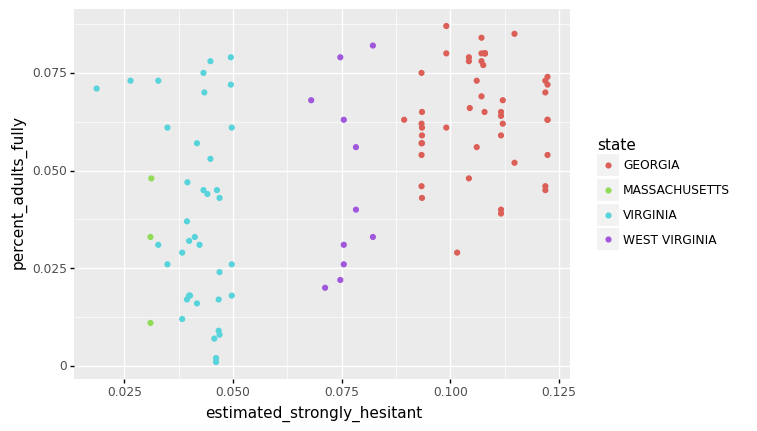

<ggplot: (8762658472798)>

<IPython.core.display.Javascript object>

In [29]:
gg_vax = p9.ggplot(lowest_vax)
gg_vax += p9.aes(
    x="estimated_strongly_hesitant", y="percent_adults_fully", color="state"
)  # add color mapping
gg_vax += p9.geom_point()
gg_vax

In [30]:
lowest_vax["cvac_category"].value_counts()

Very High Concern    29
Low Concern          21
Moderate Concern     20
Very Low Concern     15
High Concern         15
Name: cvac_category, dtype: int64

<IPython.core.display.Javascript object>

In [31]:
lowest_vax["social_vulnerability_index"].mean()

0.5841999999999999

<IPython.core.display.Javascript object>